#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import sklearn
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,plot_roc_curve,log_loss,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import seaborn as sn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Dropout,LeakyReLU
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score
warnings.simplefilter('ignore')

%matplotlib inline


### Importing the dataset

In [ ]:
#Reading the DataSet
df = pd.read_csv('/content/drive/My Drive/COVID19/COVID-19/covid_final_data.csv')

### Dataset Attributes


In [ ]:
df.columns

Index(['AGE', 'GENDER', 'FEVER', 'COUGH', 'FATIGUE', 'PAINS',
       'NASAL_CONGESTION', 'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'SORE THROAT',
       'DIARRHEA', 'CHILLS', 'HEADACHE', 'VOMITING', 'LIVES_IN_AFFECTED_AREA',
       'COVID_OUTPUT'],
      dtype='object')

**Patient's Attribute**

```
1. Age: Patient's Age
2. Gender: Male(1) or Female (0)
3. Fever: Yes(1) or No(0)
4. Cough: Yes(1) or No(0)
5. Fatigue: Yes(1) or No(0)
6. Pains: Yes(1) or No(0)
7. Nasal Congestion: Yes(1) or No(0)
8. Shortness of Breath: Yes(1) or No(0)
9. Runny Nose: Yes(1) or No(0)
10. Sore Throat: Yes(1) or No(0)
11. Diarrhea: Yes(1) or No(0)
12. Chills: Yes(1) or No(0)
13. Headache: Yes(1) or No(0)
14. Vomiting: Yes(1) or No(0)
15. Lives in affected area: Yes(1) or No(0)
---------------------------------------------
16. Covid Output: Yes(1) or No(0)
```

In [ ]:
df.head()

,AGE,GENDER,FEVER,COUGH,FATIGUE,PAINS,NASAL_CONGESTION,SHORTNESS_OF_BREATH,RUNNY_NOSE,SORE THROAT,DIARRHEA,CHILLS,HEADACHE,VOMITING,LIVES_IN_AFFECTED_AREA,COVID_OUTPUT
0,19,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1
1,28,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1
2,35,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
3,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
df.isnull().sum()

AGE                       0
GENDER                    0
FEVER                     0
COUGH                     0
FATIGUE                   0
PAINS                     0
NASAL_CONGESTION          0
SHORTNESS_OF_BREATH       0
RUNNY_NOSE                0
SORE THROAT               0
DIARRHEA                  0
CHILLS                    0
HEADACHE                  0
VOMITING                  0
LIVES_IN_AFFECTED_AREA    0
COVID_OUTPUT              0
dtype: int64

In [ ]:
np.shape(df)

(1495, 16)

#Number of samples ( Covid(1) and Non covid(0))

In [ ]:
df['COVID_OUTPUT'].value_counts().head()

1    757
0    738
Name: COVID_OUTPUT, dtype: int64

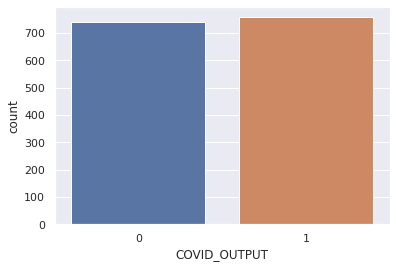

In [ ]:
sns.set(style="darkgrid")
sn.countplot(df["COVID_OUTPUT"])
plt.show()

,AGE,GENDER,FEVER,COUGH,FATIGUE,PAINS,NASAL_CONGESTION,SHORTNESS_OF_BREATH,RUNNY_NOSE,SORE THROAT,DIARRHEA,CHILLS,HEADACHE,VOMITING,LIVES_IN_AFFECTED_AREA,COVID_OUTPUT
AGE,1.000000,0.074382,0.022943,0.047645,0.097993,0.081185,0.130204,-0.031658,-0.021785,-0.105755,-0.048191,0.023023,0.016395,0.022586,-0.000310,0.006081
GENDER,0.074382,1.000000,0.053795,0.003112,-0.048996,-0.010474,0.011494,-0.016308,-0.052529,-0.062823,0.017050,-0.014599,-0.022730,0.025970,0.212699,0.013788
FEVER,0.022943,0.053795,1.000000,0.191755,-0.005902,0.060148,0.004159,-0.123018,0.010423,0.001083,0.009738,-0.017796,-0.068020,-0.020995,0.187202,0.529185
COUGH,0.047645,0.003112,0.191755,1.000000,-0.027305,0.052422,0.070611,-0.080566,0.029718,0.019849,0.020887,-0.030242,0.056511,0.014351,-0.030356,0.218632
FATIGUE,0.097993,-0.048996,-0.005902,-0.027305,1.000000,0.015797,-0.007595,-0.045449,-0.029837,0.010381,0.037218,0.033071,0.007328,0.008849,-0.016685,0.070014
PAINS,0.081185,-0.010474,0.060148,0.052422,0.015797,1.000000,0.040673,0.014355,0.031633,-0.009506,0.023900,-0.034958,-0.030098,-0.005686,-0.037240,0.057166
NASAL_CONGESTION,0.130204,0.011494,0.004159,0.070611,-0.007595,0.040673,1.000000,-0.042787,-0.043125,-0.040672,0.042957,0.020311,-0.048444,-0.009234,0.066466,0.077812
SHORTNESS_OF_BREATH,-0.031658,-0.016308,-0.123018,-0.080566,-0.045449,0.014355,-0.042787,1.000000,-0.046551,-0.047411,-0.009285,-0.022450,-0.093514,-0.034236,0.024829,0.016807
RUNNY_NOSE,-0.021785,-0.052529,0.010423,0.029718,-0.029837,0.031633,-0.043125,-0.046551,1.000000,0.062148,0.146668,-0.040708,-0.005887,0.007113,-0.017605,0.013413
SORE THROAT,-0.105755,-0.062823,0.001083,0.019849,0.010381,-0.009506,-0.040672,-0.047411,0.062148,1.000000,0.015141,0.064801,0.052343,0.065870,-0.030366,-0.008681


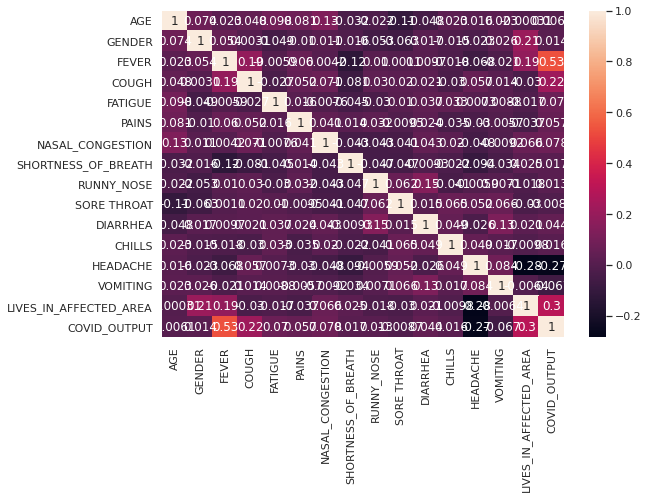

In [ ]:
plt.figure(figsize=(9,6))
c=df.corr()
sn.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)
c

### Correlation Matrix

In [ ]:
# corrMatrix = df.corr(method='spearman')  
# cor=df.corr()
# # spearman

### Visual Representation of Correlation Matrix

In [ ]:
# sns.heatmap(corrMatrix)
# plt.rcParams["figure.figsize"] = [16,10]
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

### Visual Analysis of Common Symptoms

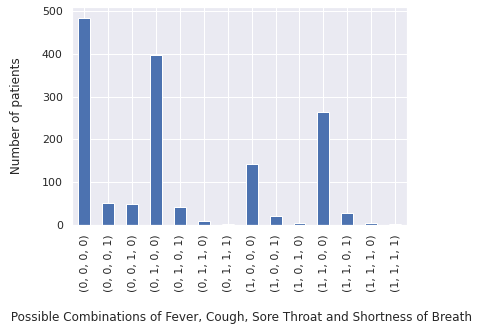

In [ ]:
plt.clf()
plt.rcParams["figure.figsize"] = [15,5]
df.groupby(['COUGH','FEVER','SHORTNESS_OF_BREATH','SORE THROAT']).size().plot(kind='bar')
plt.xlabel("\n Possible Combinations of Fever, Cough, Sore Throat and Shortness of Breath")
plt.ylabel(" Number of patients \n")
plt.show()

#Split dataset 

In [ ]:
X=df.values[:,0:15]
y=df.values[:,15]

#### Spliting the dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
feat_labels=['AGE', 'GENDER', 'FEVER', 'COUGH', 'FATIGUE', 'PAINS',
       'NASAL_CONGESTION', 'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'SORE THROAT',
       'DIARRHEA', 'CHILLS', 'HEADACHE', 'VOMITING', 'LIVES_IN_AFFECTED_AREA']

#Metrics

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

#AdaBoost classifier

In [ ]:
# for sfs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#knn = KNeighborsClassifier(n_neighbors=3) # ml_algo used = knn
#clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
sfs1 = SFS(clf,  
           k_features=7, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy', cv=4)
#after applying sfs fit the data:
sfs1.fit(X_train, y_train)
sfs1.k_feature_names_  


In [ ]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

#abc = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1,random_state=176)

abc= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2,min_samples_leaf=1, min_samples_split=2 ), learning_rate=0.01,
    random_state = 208, n_estimators=1000)
abc.fit(X_train, y_train)
#Predict the response for test dataset
y_predadb = abc.predict(X_test)
accuracy_score(y_test,y_predadb)
p=precision_score(y_test, y_predadb)
r=recall_score(y_test, y_predadb)
f=f1_score(y_test, y_predadb)
auc=roc_auc_score(y_test, y_predadb)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predadb)
print("---------------------- ADABoost Classifier without SFS Feature Selection------------------")
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))


print("---------------------- ADABoost Classifier with SFS Feature Selection------------------")

#abc1 = AdaBoostClassifier(n_estimators=3000,
                         #learning_rate=0.01,random_state=201)
#abc1 = AdaBoostClassifier(learning_rate=0.1,n_estimators=1000,random_state=178, max_depth=
# svc=SVC(probability=True, kernel='linear')
# abc1=AdaBoostClassifier(n_estimators=1000, base_estimator=svc,learning_rate=0.01,random_state=63)

abc1= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3,min_samples_leaf=1, min_samples_split=2 ), learning_rate=0.1,
    random_state = 208, n_estimators=50)



# abc1= AdaBoostClassifier(
#     DecisionTreeClassifier(random_state=20, max_depth=8,min_samples_leaf=1, min_samples_split=2 ), learning_rate=0.6,
#     random_state = 208, n_estimators=50)



# Train Adaboost Classifer
abc1.fit(X_train[:,feat_cols], y_train)
y_predadb = abc1.predict(X_test[:,feat_cols])
accuracy_score(y_test,y_predadb)
p=precision_score(y_test, y_predadb)
r=recall_score(y_test, y_predadb)
f=f1_score(y_test, y_predadb)
auc=roc_auc_score(y_test, y_predadb)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predadb)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))
import csv
with open('train10.csv', 'w', newline=None) as file:
    writer = csv.writer(file)
    writer.writerow(["{:.2f}".format(accuracy*100),"{:.2f}".format(p*100),"{:.2f}".format(sensitivity*100),"{:.2f}".format(specificity*100),"{:.2f}".format(f*100),"{:.2f}".format(auc*100)])
    # writer.writerow([p*100])
    # writer.writerow([sensitivity*100])
    # writer.writerow([specificity*100])
    # writer.writerow([f*100])
    # writer.writerow([auc*100])


[1, 2, 3, 4, 10, 12, 14]
---------------------- ADABoost Classifier without SFS Feature Selection------------------
Accuracy:    79.06%
Sensitivity:   81.98%
Specificity:  76.21%
Precision:  77.12%
Recall:  81.98%
F1_score: 79.48%
AUC: 79.10%
---------------------- ADABoost Classifier with SFS Feature Selection------------------
Accuracy:    80.62%
Sensitivity:   83.33%
Specificity:  77.97%
Precision:  78.72%
Recall:  83.33%
F1_score: 80.96%
AUC: 80.65%


In [ ]:
confusion_matrix(y_test, y_predadb)

array([[177,  50],
       [ 37, 185]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predadb))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       227
           1       0.79      0.83      0.81       222

    accuracy                           0.81       449
   macro avg       0.81      0.81      0.81       449
weighted avg       0.81      0.81      0.81       449



#MLP Classifier

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500,activation = 'relu',solver='adam',random_state=13,validation_fraction=0.2)

In [ ]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=13, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#knn = KNeighborsClassifier(n_neighbors=3) # ml_algo used = knn
#clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
#clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
clf= MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500,activation = 'relu',solver='adam',random_state=14,validation_fraction=0.2)
sfs0 = SFS(clf,  
           k_features=7, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy', cv=4)
           

#after applying sfs fit the data:
sfs0.fit(X_train, y_train)
sfs0.k_feature_names_  


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished

[2020-10-26 20:58:26] Features: 14/7 -- score: 0.8030256500248605[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  1.0min finished

[2020-10-26 20:59:27] Features: 13/7 -- score: 0.803976192565295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   54.0s finished

[2020-10-26 21:00:21] Features: 12/7 -- score: 0.8087435289988594[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

('1', '2', '3', '8', '12', '13', '14')

In [ ]:
feat_cols = list(sfs0.k_feature_idx_)
print(feat_cols)
classifier= MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500,activation = 'relu',alpha=1e-5,solver='adam',random_state=16)
classifier.fit(X_train, y_train)


y_predmlp = classifier.predict(X_test)
accuracy_score(y_test,y_predmlp)
p=precision_score(y_test, y_predmlp)
r=recall_score(y_test, y_predmlp)
f=f1_score(y_test, y_predmlp)
auc=roc_auc_score(y_test, y_predmlp)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predmlp)
print("------------ MPL classifier Results without Feature selection-------------------")

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))


[1, 2, 3, 8, 12, 13, 14]
------------ MPL classifier Results without Feature selection-------------------
Accuracy:    78.40%
Sensitivity:   83.78%
Specificity:  73.13%
Precision:  75.30%
Recall:  83.78%
F1_score: 79.32%
AUC: 78.46%


In [ ]:
classifier1 = MLPClassifier(hidden_layer_sizes=(30,20,20), max_iter=500,activation = 'relu',alpha=1e-5,solver='adam',random_state=16)

classifier1.fit(X_train[:,feat_cols], y_train)
y_predmlp1 = classifier1.predict(X_test[:,feat_cols])

accuracy_score(y_test,y_predmlp1)
p=precision_score(y_test, y_predmlp1)
r=recall_score(y_test, y_predmlp1)
f=f1_score(y_test, y_predmlp1)
auc=roc_auc_score(y_test, y_predmlp1)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predmlp1)
print("------------ MPL classifier Results with Feature selection-------------------")

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))

with open('train10.csv', 'a+', newline=None) as file:
    writer = csv.writer(file)
    writer.writerow(["{:.2f}".format(accuracy*100),"{:.2f}".format(p*100),"{:.2f}".format(sensitivity*100),"{:.2f}".format(specificity*100),"{:.2f}".format(f*100),"{:.2f}".format(auc*100)])

------------ MPL classifier Results with Feature selection-------------------
Accuracy:    80.18%
Sensitivity:   82.43%
Specificity:  77.97%
Precision:  78.54%
Recall:  82.43%
F1_score: 80.44%
AUC: 80.20%


#XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier(learning_rate=0.01,n_estimators=100, random_state=256)
sfs2 = SFS(clf,  
           k_features=7, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy',cv=0)
           

#after applying sfs fit the data:
sfs2.fit(X_train, y_train)
sfs2.k_feature_names_  


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2020-10-26 21:04:05] Features: 14/7 -- score: 0.8126195028680688[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.7s finished

[2020-10-26 21:04:06] Features: 13/7 -- score: 0.8126195028680688[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.6s finished

[2020-10-26 21:04:07] Features: 12/7 -- score: 0.8126195028680688[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('0', '1', '2', '3', '5', '12', '14')

In [ ]:
feat_cols = list(sfs2.k_feature_idx_)
print(feat_cols)
xgboost = XGBClassifier(learning_rate=0.02,n_estimators=50, random_state=256)
xgboost.fit(X_train, y_train)
# make predictions for test data
predxgboost = xgboost.predict(X_test)
#predictions = [round(value) for value in predxgboost]
# make predictions for test data
accuracy_score(y_test,predxgboost)
p=precision_score(y_test, predxgboost)
r=recall_score(y_test, predxgboost)
f=f1_score(y_test, predxgboost)
auc=roc_auc_score(y_test, predxgboost)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, predxgboost)
print("-----------------XGBoost Classifier without SFS classifier-----------------------")

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))

print("-----------------XGBoost Classifier with SFS classifier-----------------------")

xgboost1 = XGBClassifier(max_depth=7,learning_rate=0.1,n_estimators=1000,random_state=178, subsample= 0.9,colsample_bytree=1,
gamma= 5)
#xgboost1 = XGBClassifier(learning_rate=0.01,n_estimators=100,random_state=78,max_depth=12)

xgboost1.fit(X_train[:,feat_cols], y_train)
# make predictions for test data
predxgboost1 = xgboost1.predict(X_test[:,feat_cols])
#predictions1 = [round(value) for value in predxgboost]
# make predictions for test data
accuracy_score(y_test,predxgboost1)
p=precision_score(y_test, predxgboost1)
r=recall_score(y_test, predxgboost1)
f=f1_score(y_test, predxgboost1)
auc=roc_auc_score(y_test, predxgboost1)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, predxgboost1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))
with open('train10.csv', 'a+', newline=None) as file:
    writer = csv.writer(file)
    writer.writerow(["{:.2f}".format(accuracy*100),"{:.2f}".format(p*100),"{:.2f}".format(sensitivity*100),"{:.2f}".format(specificity*100),"{:.2f}".format(f*100),"{:.2f}".format(auc*100)])

[0, 1, 2, 3, 5, 12, 14]
-----------------XGBoost Classifier without SFS classifier-----------------------
Accuracy:    80.40%
Sensitivity:   83.33%
Specificity:  77.53%
Precision:  78.39%
Recall:  83.33%
F1_score: 80.79%
AUC: 80.43%
-----------------XGBoost Classifier with SFS classifier-----------------------
Accuracy:    81.96%
Sensitivity:   82.43%
Specificity:  81.50%
Precision:  81.33%
Recall:  82.43%
F1_score: 81.88%
AUC: 81.97%


#SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
sfs3 = SFS(clf,  
           k_features=7, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy',cv=0)
           

#after applying sfs fit the data:
sfs3.fit(X_train, y_train)
sfs3.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.2s finished

[2020-10-26 21:04:11] Features: 14/7 -- score: 0.7944550669216062[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2020-10-26 21:04:12] Features: 13/7 -- score: 0.7954110898661568[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2020-10-26 21:04:12] Features: 12/7 -- score: 0.7954110898661568[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('1', '2', '4', '5', '6', '10', '12')

In [ ]:
feat_cols = list(sfs3.k_feature_idx_)
print(feat_cols)
#Create a svm Classifier
SVM = svm.SVC( C=0.01, kernel='linear')

#Train the model using the training sets
SVM.fit(X_train, y_train)

#Predict the response for test dataset
y_predsvm = SVM.predict(X_test)
p=precision_score(y_test, y_predsvm)
r=recall_score(y_test, y_predsvm)
f=f1_score(y_test, y_predsvm)
auc=roc_auc_score(y_test, y_predsvm)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predsvm)
print("-------------------- SVM classifier without SFS Feature Selection -----------------")
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))


print("------------------SVM classifier with SFS Feature Selection -----------------")

#Create a svm Classifier
SVM1 = svm.SVC(kernel='linear',C=0.01) # Linear Kernel

#Train the model using the training sets
SVM1.fit(X_train[:, feat_cols], y_train)

#Predict the response for test dataset
y_predsvm1 = SVM1.predict(X_test[:,feat_cols])
p=precision_score(y_test, y_predsvm1)
r=recall_score(y_test, y_predsvm1)
f=f1_score(y_test, y_predsvm1)
auc=roc_auc_score(y_test, y_predsvm1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predsvm1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))
with open('train10.csv', 'a+', newline=None) as file:
    writer = csv.writer(file)
    writer.writerow(["{:.2f}".format(accuracy*100),"{:.2f}".format(p*100),"{:.2f}".format(sensitivity*100),"{:.2f}".format(specificity*100),"{:.2f}".format(f*100),"{:.2f}".format(auc*100)])

[1, 2, 4, 5, 6, 10, 12]
-------------------- SVM classifier without SFS Feature Selection -----------------
Accuracy:    76.61%
Sensitivity:   75.68%
Specificity:  77.53%
Precision:  76.71%
Recall:  75.68%
F1_score: 76.19%
AUC: 76.60%
------------------SVM classifier with SFS Feature Selection -----------------
Accuracy:    76.61%
Sensitivity:   75.68%
Specificity:  77.53%
Precision:  76.71%
Recall:  75.68%
F1_score: 76.19%
AUC: 76.60%


#Random Forest Classifier



In [ ]:
clf=RandomForestClassifier(n_estimators=1000,random_state=45,max_depth=4)

sfs4 = SFS(clf,  
           k_features=7, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy',cv=4)
           

#after applying sfs fit the data:
sfs4.fit(X_train, y_train)
sfs4.k_feature_names_  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished

[2020-10-26 21:05:30] Features: 14/7 -- score: 0.8097123512035331[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  1.1min finished

[2020-10-26 21:06:37] Features: 13/7 -- score: 0.8106775174753589[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  1.0min finished

[2020-10-26 21:07:39] Features: 12/7 -- score: 0.8125932262876194[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('1', '2', '3', '4', '9', '12', '14')

In [ ]:
feat_cols = list(sfs4.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 9, 12, 14]


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RFC=RandomForestClassifier(n_estimators=50,random_state=45,max_depth=8)
#Train the model using the training sets y_pred=clf.predict(X_test)
RFC.fit(X_train,y_train)
y_predrf=RFC.predict(X_test)
p=precision_score(y_test, y_predrf)
r=recall_score(y_test, y_predrf)
f=f1_score(y_test, y_predrf)
auc=roc_auc_score(y_test, y_predrf)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predrf)
print("------------Random Forest Classifier without SFS feature selection--------------------")
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))

print("------------Random Forest Classifier with SFS feature selection--------------------")

#Create a Gaussian Classifier
RFC1=RandomForestClassifier(n_estimators=1000,random_state=450,max_depth=5,min_samples_leaf=4)

#RFC1=RandomForestClassifier(n_estimators=2000,random_state=450)
#Train the model using the training sets y_pred=clf.predict(X_test)
RFC1.fit(X_train[:,feat_cols],y_train)
y_predrf1=RFC1.predict(X_test[:,feat_cols])
p=precision_score(y_test, y_predrf1)
r=recall_score(y_test, y_predrf1)
f=f1_score(y_test, y_predrf1)
auc=roc_auc_score(y_test, y_predrf1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predrf1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))
with open('train10.csv', 'a+', newline=None) as file:
    writer = csv.writer(file)
    writer.writerow(["{:.2f}".format(accuracy*100),"{:.2f}".format(p*100),"{:.2f}".format(sensitivity*100),"{:.2f}".format(specificity*100),"{:.2f}".format(f*100),"{:.2f}".format(auc*100)])

------------Random Forest Classifier without SFS feature selection--------------------
Accuracy:    78.84%
Sensitivity:   81.53%
Specificity:  76.21%
Precision:  77.02%
Recall:  81.53%
F1_score: 79.21%
AUC: 78.87%
------------Random Forest Classifier with SFS feature selection--------------------
Accuracy:    81.51%
Sensitivity:   82.43%
Specificity:  80.62%
Precision:  80.62%
Recall:  82.43%
F1_score: 81.51%
AUC: 81.52%


#Logistic Regression

In [ ]:
clf= LogisticRegression()

sfs5 = SFS(clf,  
           k_features=7, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy',cv=4)
           

#after applying sfs fit the data:
sfs5.fit(X_train, y_train)
sfs5.k_feature_names_  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.9s finished

[2020-10-26 21:11:38] Features: 14/7 -- score: 0.8039652247667516[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.7s finished

[2020-10-26 21:11:40] Features: 13/7 -- score: 0.8068387879851424[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.7s finished

[2020-10-26 21:11:42] Features: 12/7 -- score: 0.8077966423912726[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('2', '3', '4', '5', '6', '12', '14')

In [ ]:
feat_cols = list(sfs5.k_feature_idx_)
print(feat_cols)
lr = LogisticRegression(random_state=69,C=0.1)
lr.fit(X_train,y_train)
y_predlr=lr.predict(X_test)
accuracy_score(y_test,y_predlr)
p=precision_score(y_test, y_predlr)
r=recall_score(y_test, y_predlr)
f=f1_score(y_test, y_predlr)
auc=roc_auc_score(y_test, y_predlr)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predlr)
print("------------Logistic Regression Classifier without SFS feature selection--------------------")

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))

print("------------Logistic Regression Classifier with SFS feature selection--------------------")

lr1 = LogisticRegression(random_state=999)
lr1.fit(X_train[:,feat_cols],y_train)
y_predlr1=lr1.predict(X_test[:,feat_cols])
p=precision_score(y_test, y_predlr1)
r=recall_score(y_test, y_predlr1)
f=f1_score(y_test, y_predlr1)
auc=roc_auc_score(y_test, y_predlr1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_predlr1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))
with open('train10.csv', 'a+', newline=None) as file:
    writer = csv.writer(file)
    writer.writerow(["{:.2f}".format(accuracy*100),"{:.2f}".format(p*100),"{:.2f}".format(sensitivity*100),"{:.2f}".format(specificity*100),"{:.2f}".format(f*100),"{:.2f}".format(auc*100)])



[2, 3, 4, 5, 6, 12, 14]
------------Logistic Regression Classifier without SFS feature selection--------------------
Accuracy:    78.84%
Sensitivity:   79.28%
Specificity:  78.41%
Precision:  78.22%
Recall:  79.28%
F1_score: 78.75%
AUC: 78.85%
------------Logistic Regression Classifier with SFS feature selection--------------------
Accuracy:    77.73%
Sensitivity:   75.23%
Specificity:  80.18%
Precision:  78.77%
Recall:  75.23%
F1_score: 76.96%
AUC: 77.70%



#Decision Tree classifier

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
clf = DecisionTreeClassifier()
sfs7 = SFS(clf,  
           k_features=7, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy',cv=4)
           

#after applying sfs fit the data:
sfs7.fit(X_train, y_train)
sfs7.k_feature_names_  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished

[2020-10-26 21:11:45] Features: 14/7 -- score: 0.7829509227574507[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2020-10-26 21:11:45] Features: 13/7 -- score: 0.7934690415606447[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2020-10-26 21:11:45] Features: 12/7 -- score: 0.7992161679974262[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('1', '2', '3', '4', '10', '12', '14')

In [ ]:
feat_cols = list(sfs7.k_feature_idx_)
print(feat_cols)


dtc = DecisionTreeClassifier(max_depth=4,random_state=0)
dtc.fit(X_train,y_train)
pred_dtc=dtc.predict(X_test)
p=precision_score(y_test, pred_dtc)
r=recall_score(y_test, pred_dtc)
f=f1_score(y_test, pred_dtc)
auc=roc_auc_score(y_test, pred_dtc)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, pred_dtc)
print("-----------------Decision Tree Classifier without SFS classifier-----------------------")

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))

print("-----------------Decision Tree Classifier without SFS classifier-----------------------")

dtc1 = DecisionTreeClassifier(random_state=0, max_depth=4)
dtc1.fit(X_train[:,feat_cols],y_train)
pred_dtc1=dtc1.predict(X_test[:,feat_cols])
p=precision_score(y_test, pred_dtc1)
r=recall_score(y_test, pred_dtc1)
f=f1_score(y_test, pred_dtc1)
auc=roc_auc_score(y_test, pred_dtc1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, pred_dtc1)
print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))
with open('train10.csv', 'a+', newline=None) as file:
    writer = csv.writer(file)
    writer.writerow(["{:.2f}".format(accuracy*100),"{:.2f}".format(p*100),"{:.2f}".format(sensitivity*100),"{:.2f}".format(specificity*100),"{:.2f}".format(f*100),"{:.2f}".format(auc*100)])

[1, 2, 3, 4, 10, 12, 14]
-----------------Decision Tree Classifier without SFS classifier-----------------------
Accuracy:    80.18%
Sensitivity:   83.33%
Specificity:  77.09%
Precision:  78.06%
Recall:  83.33%
F1_score: 80.61%
AUC: 80.21%
-----------------Decision Tree Classifier without SFS classifier-----------------------
Accuracy:    80.40%
Sensitivity:   84.23%
Specificity:  76.65%
Precision:  77.92%
Recall:  84.23%
F1_score: 80.95%
AUC: 80.44%


# Gradient Boosting

In [ ]:

clf = GradientBoostingClassifier(learning_rate=0.001,n_estimators=50,random_state=6)

sfs8 = SFS(clf,  
           k_features=7, 
           forward=False, # if forward = True then SFS otherwise SBS
           floating=False, 
           verbose=2,
           scoring='accuracy',cv=4)
           

#after applying sfs fit the data:
sfs8.fit(X_train, y_train)
sfs8.k_feature_names_  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.6s finished

[2020-10-26 21:11:49] Features: 14/7 -- score: 0.796331636980492[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.4s finished

[2020-10-26 21:11:51] Features: 13/7 -- score: 0.7982400339270568[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.8s finished

[2020-10-26 21:11:53] Features: 12/7 -- score: 0.7982619695241437[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

('1', '2', '3', '4', '5', '6', '12')

In [ ]:
feat_cols = list(sfs8.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 5, 6, 12]


In [ ]:
GBC=GradientBoostingClassifier(learning_rate=0.001,n_estimators=50,random_state=6)
GBC.fit(X_train, y_train)
y_test_pred = GBC.predict(X_test)
#accuracy_score(y_test,y_test_pred)
p=precision_score(y_test, y_test_pred)
r=recall_score(y_test, y_test_pred)
f=f1_score(y_test, y_test_pred)
auc=roc_auc_score(y_test, y_test_pred)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_test_pred)
print("-----------------Gradient Boosting Classifier without SFS feature  selection -----------------------")

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))


GBC1=GradientBoostingClassifier(learning_rate=0.009,n_estimators=50,random_state=36,max_depth=6)
GBC1.fit(X_train[:, feat_cols], y_train)
y_test_pred1 = GBC1.predict(X_test[:, feat_cols])
#accuracy_score(y_test,y_test_pred)
p=precision_score(y_test, y_test_pred1)
r=recall_score(y_test, y_test_pred1)
f=f1_score(y_test, y_test_pred1)
auc=roc_auc_score(y_test, y_test_pred1)

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_test_pred1)
print("-----------------Gradient Boosting Classifier with SFS Feature selection-----------------------")

print ("Accuracy:    %.2f%%"  %  (accuracy*100))
print ("Sensitivity:   %.2f%%"  %  (sensitivity*100))
print ("Specificity:  %.2f%%"  %  (specificity*100))
print ("Precision:  %.2f%%"  %  (p*100))
print ("Recall:  %.2f%%"  %  (r*100))
print ("F1_score: %.2f%%"  %  (f*100))
print ("AUC: %.2f%%"  %  (auc*100))
with open('train10.csv', 'a+', newline=None) as file:
    writer = csv.writer(file)
    writer.writerow(["{:.2f}".format(accuracy*100),"{:.2f}".format(p*100),"{:.2f}".format(sensitivity*100),"{:.2f}".format(specificity*100),"{:.2f}".format(f*100),"{:.2f}".format(auc*100)])

-----------------Gradient Boosting Classifier without SFS feature  selection -----------------------
Accuracy:    80.40%
Sensitivity:   86.04%
Specificity:  74.89%
Precision:  77.02%
Recall:  86.04%
F1_score: 81.28%
AUC: 80.46%
-----------------Gradient Boosting Classifier with SFS Feature selection-----------------------
Accuracy:    77.06%
Sensitivity:   76.58%
Specificity:  77.53%
Precision:  76.92%
Recall:  76.58%
F1_score: 76.75%
AUC: 77.05%


# Area Under Curve Analysis : Without SFS



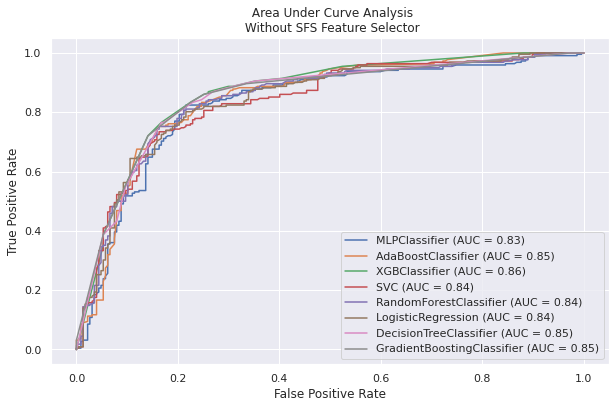

In [ ]:
plt.rcParams["figure.figsize"] = [10,6]
disp = plot_roc_curve(classifier,X_test,y_test)
plt.title(' Area Under Curve Analysis\n Without SFS Feature Selector')
plot_roc_curve(abc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(SVM,X_test,y_test,ax=disp.ax_)
plot_roc_curve(RFC,X_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(GBC,X_test,y_test,ax=disp.ax_)

# Area Under Curve Analysis : With SFS

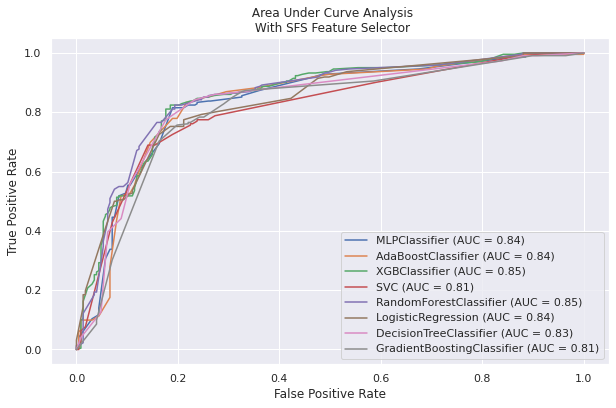

In [ ]:
plt.rcParams["figure.figsize"] = [10,6]
feat_cols = list(sfs0.k_feature_idx_)
disp = plot_roc_curve(classifier1,X_test[:, feat_cols],y_test)
feat_cols = list(sfs1.k_feature_idx_)
plt.title(' Area Under Curve Analysis\n With SFS Feature Selector')
plot_roc_curve(abc1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs2.k_feature_idx_)
plot_roc_curve(xgboost1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs3.k_feature_idx_)
plot_roc_curve(SVM1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs4.k_feature_idx_)
plot_roc_curve(RFC1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs5.k_feature_idx_)
plot_roc_curve(lr1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs7.k_feature_idx_)
plot_roc_curve(dtc1,X_test[:, feat_cols],y_test,ax=disp.ax_)
feat_cols = list(sfs8.k_feature_idx_)
plot_roc_curve(GBC1,X_test[:, feat_cols],y_test,ax=disp.ax_)